In [9]:
import sys
sys.path.append('./../hyperAFM')
sys.path.append('./../Jessica')
sys.path.append('./../data')

import numpy as np
from util import HyperImage
from gen_features import get_hyper_peaks
from PCAsynthetic import makefeaturematrix, stdfeature
import FindPeaks 
#for standardizing 
from sklearn.preprocessing import scale

#PCA packages
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib.mlab import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hyperimage = HyperImage('./../../Desktop/20170706_0712_0726_P3HTPMMA_hyper/Film10_0026.txt')
hyper = hyperimage.hyper_image
wavelengths = hyperimage.wavelength_data

In [3]:
peaklocs, averagespectrum = get_hyper_peaks(hyper, threshold = 0.1)

array([ 62, 168, 199, 233, 294, 382, 418, 521], dtype=int64)

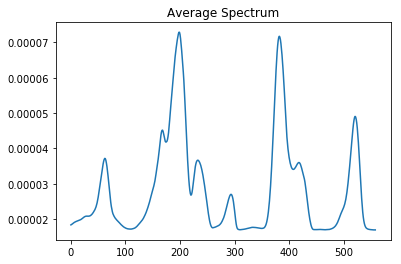

In [4]:
plt.plot(averagespectrum)
plt.title('Average Spectrum')
indices, peaksdict = FindPeaks.FindPeaks(averagespectrum, thres=0.1, min_dist=1)
indices


In [15]:
#standardize feature matrix to unit variance and zero mean 
featurematrix = makefeaturematrix(hyper, averagespectrum)
featurematrix_std = stdfeature(featurematrix, axis = 0)
mean = featurematrix_std.mean(axis=0)
variance = featurematrix_std.std(axis=0)
print(mean, variance)

(array([  9.26536307e-15,   1.28552501e-14,   1.07664816e-14,
        -3.04528944e-14,  -4.60071027e-16,   1.52243838e-15,
         2.08173068e-14,  -1.79396598e-14]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))


In [46]:
#define number of principal components 
sklearn_pca = sklearnPCA(n_components=8)

#matrix with each sample in terms of the PCs
SkPC = sklearn_pca.fit_transform(featurematrix_std)

#covariance matrix 
Skcov = sklearn_pca.get_covariance()

#score matrix 
Skscore = sklearn_pca.score_samples(featurematrix_std)

#loadings
Skloadings = sklearn_pca.components_

#explained variance
Skvariance = sklearn_pca.explained_variance_
Skvarianceratio = sklearn_pca.explained_variance_ratio_

In [40]:
SkPCreshape = SkPC.reshape(256,256,8)

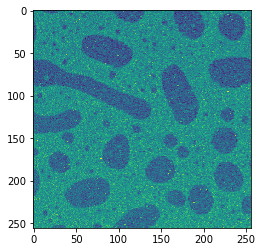

In [34]:
plt.imshow(SkPCreshape[:,:,0])

In [45]:
Skscore

array([-11.41222018,  -9.99996092, -10.06982506, ..., -11.22355057,
       -11.94402687,  -8.52215486])

In [61]:
wavelengths[521]

833.93369175627197

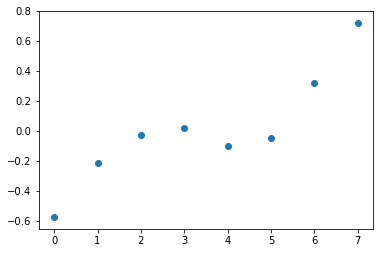

In [55]:
plt.scatter([0,1,2,3,4,5,6,7],Skloadings[:,0])

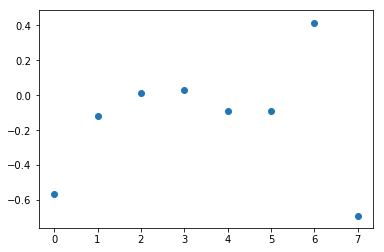

In [59]:
plt.scatter([0,1,2,3,4,5,6,7],Skloadings[:,2])